In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lime shap

     |████████████████████████████████| 275 kB 5.2 MB/s 
     |████████████████████████████████| 564 kB 46.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=92b33a5df5785bff6b330b9b6fc9d5c66969140d02dba11098aa0e5e2c8f253c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import pandas as pd

In [89]:
data = pd.read_csv("drive/MyDrive/VML/census-income.csv", na_values=' ?', header=None)

In [90]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [91]:
data.columns = [
"age",
"class_of_worker",
"detailed_industry_recode",
"detailed_occupation_recode",
"education",
"wage_per_hour",
"enroll_in_edu_inst_last_wk",
"marital_stat",
"major_industry_code",
"major_occupation_code",
"race",
"hispanic_origin",
"sex",
"member_of_a_labor_union",
"reason_for_unemployment",
"full_or_part time employment stat",
"capital_gains",
"capital_losses",
"dividends_from_stocks",
"tax_filer_stat",
"region_of_previous_residence",
"state_of_previous_residence",
"detailed_household_and_family_stat",
"detailed_household_summary_in_household",
"instance_weight",
"migration_code_change_in_msa",
"migration_code_change in reg",
"migration_code_move_within_reg",
"live_in_this_house_1_year_ago",
"migration_prev_res_in_sunbelt",
"num_persons_worked_for_employer",
"family_members_under_18",
"country_of_birth_father",
"country_of_birth_mother",
"country_of birth_self",
"citizenship",
"own_business_or_self_employed",
"fill_inc_questionnaire_for_veteran's_admin",
"veterans_benefits",
"weeks_worked_in_year",
"year",
"under_50k_over_50k"
]

In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [93]:
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part time employment stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change in reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [94]:
data['under_50k_over_50k'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [95]:
data.isnull().sum()

age                                               0
class_of_worker                                   0
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                        0
marital_stat                                      0
major_industry_code                               0
major_occupation_code                             0
race                                              0
hispanic_origin                                   0
sex                                               0
member_of_a_labor_union                           0
reason_for_unemployment                           0
full_or_part time employment stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

In [96]:
data['under_50k_over_50k'] = le.fit_transform(data['under_50k_over_50k'])

In [97]:
data['under_50k_over_50k'].unique()

array([0, 1])

In [98]:
data.head(10)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part time employment stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code_change_in_msa,migration_code_change in reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,0
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not

In [99]:
data['age'].unique()

array([73, 58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39,
       16, 35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66,
       84, 52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53,
       40, 54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45,
       62, 23, 69, 75, 44, 59, 60, 64, 65, 70, 67, 78, 20, 14, 83, 86, 89,
       77, 79, 82, 80, 87, 88])

In [100]:
data["class_of_worker"] = data["class_of_worker"].str.replace(" ", "", n = 1)

In [101]:
data['class_of_worker'].unique()

array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)

In [102]:
data["education"] = data["education"].str.replace(" ", "", n = 1)

In [103]:
data['education'].unique()

array(['High school graduate', 'Some college but no degree', '10th grade',
       'Children', 'Bachelors degree(BA AB BS)',
       'Masters degree(MA MS MEng MEd MSW MBA)', 'Less than 1st grade',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       '11th grade', 'Doctorate degree(PhD EdD)', '9th grade',
       '1st 2nd 3rd or 4th grade'], dtype=object)

In [104]:
data["enroll_in_edu_inst_last_wk"] = data["enroll_in_edu_inst_last_wk"].str.replace(" ", "", n = 1)

In [105]:
data["marital_stat"] = data["marital_stat"].str.replace(" ", "", n = 1)

In [106]:
data["major_industry_code"] = data["major_industry_code"].str.replace(" ", "", n = 1)

In [107]:
data["major_occupation_code"] = data["major_occupation_code"].str.replace(" ", "", n = 1)

In [108]:
data["race"] = data["race"].str.replace(" ", "", n = 1)

In [109]:
data["hispanic_origin"] = data["hispanic_origin"].str.replace(" ", "", n = 1)

In [110]:
data["sex"] = data["sex"].str.replace(" ", "", n = 1)

In [111]:
data["member_of_a_labor_union"] = data["member_of_a_labor_union"].str.replace(" ", "", n = 1)

In [112]:
data["reason_for_unemployment"] = data["reason_for_unemployment"].str.replace(" ", "", n = 1)

In [113]:
data["full_or_part time employment stat"] = data["full_or_part time employment stat"].str.replace(" ", "", n = 1)

In [114]:
data["tax_filer_stat"] = data["tax_filer_stat"].str.replace(" ", "", n = 1)

In [115]:
data["region_of_previous_residence"] = data["region_of_previous_residence"].str.replace(" ", "", n = 1)

In [116]:
data["state_of_previous_residence"] = data["state_of_previous_residence"].str.replace(" ", "", n = 1)

In [117]:
data["detailed_household_and_family_stat"] = data["detailed_household_and_family_stat"].str.replace(" ", "", n = 1)

In [118]:
data["live_in_this_house_1_year_ago"] = data["live_in_this_house_1_year_ago"].str.replace(" ", "", n = 1)

In [119]:
data["family_members_under_18"] = data["family_members_under_18"].str.replace(" ", "", n = 1)

In [120]:
data["country_of_birth_father"] = data["country_of_birth_father"].str.replace(" ", "", n = 1)

In [121]:
data["country_of_birth_mother"] = data["country_of_birth_mother"].str.replace(" ", "", n = 1)

In [122]:
data["country_of birth_self"] = data["country_of birth_self"].str.replace(" ", "", n = 1)

In [123]:
data["citizenship"] = data["citizenship"].str.replace(" ", "", n = 1)

In [124]:
data["fill_inc_questionnaire_for_veteran's_admin"] = data["fill_inc_questionnaire_for_veteran's_admin"].str.replace(" ", "", n = 1)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   detailed_industry_recode                    199523 non-null  int64  
 3   detailed_occupation_recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  199523 non-null  object 
 7   marital_stat                                199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

### Removing columns with no significant contribution: 
migration_code_change_in_msa, migration_code_change in reg, migration_code_move_within_reg, migration_prev_res_in_sunbelt

because approximately 50% of it's rows have null values.

In [126]:
data.drop(['migration_code_change_in_msa', 'migration_code_change in reg', 'migration_code_move_within_reg',
                  'migration_prev_res_in_sunbelt'], inplace=True, axis=1)

In [127]:
data.isnull().sum()

age                                              0
class_of_worker                                  0
detailed_industry_recode                         0
detailed_occupation_recode                       0
education                                        0
wage_per_hour                                    0
enroll_in_edu_inst_last_wk                       0
marital_stat                                     0
major_industry_code                              0
major_occupation_code                            0
race                                             0
hispanic_origin                                  0
sex                                              0
member_of_a_labor_union                          0
reason_for_unemployment                          0
full_or_part time employment stat                0
capital_gains                                    0
capital_losses                                   0
dividends_from_stocks                            0
tax_filer_stat                 

In [128]:
data = data.dropna()

In [129]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [130]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
age,1.000000,0.169721,0.128997,0.040393,0.054098,0.063746,0.103232,0.002515,0.153708,0.002545,0.677534,0.220417,0.002752,0.138044
detailed_industry_recode,0.169721,1.000000,0.561619,0.166769,0.065319,0.073027,0.014001,0.029402,0.641485,0.252646,0.482118,0.752878,0.004586,0.193925
detailed_occupation_recode,0.128997,0.561619,1.000000,0.195533,0.003227,0.045359,-0.025160,0.027755,0.516025,0.229814,0.445278,0.656051,-0.002262,0.014784
wage_per_hour,0.040393,0.166769,0.195533,1.000000,-0.001992,0.012320,-0.005208,0.012503,0.192664,0.053707,0.115299,0.197206,0.002440,0.024955
capital_gains,0.054098,0.065319,0.003227,-0.001992,1.000000,-0.012554,0.129321,0.003118,0.057059,0.016057,0.051536,0.082563,0.006081,0.239853
capital_losses,0.063746,0.073027,0.045359,0.012320,-0.012554,1.000000,0.043948,0.007627,0.085366,0.024352,0.075847,0.101580,-0.000460,0.147426
dividends_from_stocks,0.103232,0.014001,-0.025160,-0.005208,0.129321,0.043948,1.000000,0.000170,0.008350,-0.004106,0.053994,0.014655,0.002261,0.175438
instance_weight,0.002515,0.029402,0.027755,0.012503,0.003118,0.007627,0.000170,1.000000,0.043467,0.011932,0.042725,0.030058,0.014922,0.014232
num_persons_worked_for_employer,0.153708,0.641485,0.516025,0.192664,0.057059,0.085366,0.008350,0.043467,1.000000,0.239518,0.469751,0.747293,0.020266,0.221900
own_business_or_self_employed,0.002545,0.252646,0.229814,0.053707,0.016057,0.024352,-0.004106,0.011932,0.239518,1.000000,0.180195,0.266020,0.008896,0.040858


### Label Encoder

In [131]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190561 entries, 0 to 199521
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         190561 non-null  int64  
 1   class_of_worker                             190561 non-null  object 
 2   detailed_industry_recode                    190561 non-null  int64  
 3   detailed_occupation_recode                  190561 non-null  int64  
 4   education                                   190561 non-null  object 
 5   wage_per_hour                               190561 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  190561 non-null  object 
 7   marital_stat                                190561 non-null  object 
 8   major_industry_code                         190561 non-null  object 
 9   major_occupation_code                       190561 non-null  object 
 

In [133]:
data['class_of_worker'] = le.fit_transform(data['class_of_worker'])
data['education'] = le.fit_transform(data['education'])
data['enroll_in_edu_inst_last_wk'] = le.fit_transform(data['enroll_in_edu_inst_last_wk'])
data['marital_stat'] = le.fit_transform(data['marital_stat'])
data['major_industry_code'] = le.fit_transform(data['major_industry_code'])
data['major_occupation_code'] = le.fit_transform(data['major_occupation_code'])
data['race'] = le.fit_transform(data['race'])
data['hispanic_origin'] = le.fit_transform(data['hispanic_origin'])
data['sex'] = le.fit_transform(data['sex'])

data['member_of_a_labor_union'] = le.fit_transform(data['member_of_a_labor_union'])
data['reason_for_unemployment'] = le.fit_transform(data['reason_for_unemployment'])
data['full_or_part time employment stat'] = le.fit_transform(data['full_or_part time employment stat'])
data['tax_filer_stat'] = le.fit_transform(data['tax_filer_stat'])
data['region_of_previous_residence'] = le.fit_transform(data['region_of_previous_residence'])
data['state_of_previous_residence'] = le.fit_transform(data['state_of_previous_residence'])
data['detailed_household_and_family_stat'] = le.fit_transform(data['detailed_household_and_family_stat'])
data['detailed_household_summary_in_household'] = le.fit_transform(data['detailed_household_summary_in_household'])

data['live_in_this_house_1_year_ago'] = le.fit_transform(data['live_in_this_house_1_year_ago'])
data['family_members_under_18'] = le.fit_transform(data['family_members_under_18'])
data['country_of_birth_father'] = le.fit_transform(data['country_of_birth_father'])
data['country_of_birth_mother'] = le.fit_transform(data['country_of_birth_mother'])
data['country_of birth_self'] = le.fit_transform(data['country_of birth_self'])
data['citizenship'] = le.fit_transform(data['citizenship'])
data["fill_inc_questionnaire_for_veteran's_admin"] = le.fit_transform(data["fill_inc_questionnaire_for_veteran's_admin"])
#data['under_50k_over_50k'] = le.fit_transform(data['under_50k_over_50k'])

In [134]:
data['under_50k_over_50k'].unique()

array([0, 1])

In [135]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [136]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part time employment stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,live_in_this_house_1_year_ago,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
age,1.000000,0.092816,0.169721,0.128997,0.019946,0.040393,0.164359,-0.307302,-0.064257,0.011371,0.074061,-0.103542,-0.052343,-0.023687,-0.002790,0.222867,0.054098,0.063746,0.103232,-0.317599,-0.006895,0.052804,0.532072,0.481348,0.002515,0.092033,0.153708,0.693372,-0.049409,-0.042595,-0.062508,-0.047309,0.002545,-0.065944,0.677534,0.220417,0.002752,0.138044
class_of_worker,0.092816,1.000000,0.300555,0.376383,0.072978,0.037667,-0.023536,-0.166485,-0.136802,0.054110,0.058028,-0.039005,0.078191,-0.091778,0.029065,0.056151,0.048369,0.044538,0.015705,-0.111023,-0.003829,-0.008096,0.125046,0.093979,0.008887,-0.008096,0.168599,0.236669,0.008815,0.006423,-0.027104,-0.030472,0.121574,0.006890,0.249188,0.382093,-0.000721,0.098176
detailed_industry_recode,0.169721,0.300555,1.000000,0.561619,0.180654,0.166769,-0.044971,-0.314321,-0.024347,0.116701,0.029734,-0.061435,-0.030551,-0.200259,0.049209,0.108783,0.065319,0.073027,0.014001,-0.225786,0.001559,-0.012474,0.292464,0.230867,0.029402,-0.016852,0.641485,0.459708,0.036689,0.028428,-0.023260,-0.015438,0.252646,-0.001165,0.482118,0.752878,0.004586,0.193925
detailed_occupation_recode,0.128997,0.376383,0.561619,1.000000,0.073384,0.195533,-0.044963,-0.265313,-0.188243,0.073190,0.027735,0.000092,0.138680,-0.140848,0.037583,0.127729,0.003227,0.045359,-0.025160,-0.170614,0.002387,-0.018454,0.192283,0.134972,0.027755,-0.020375,0.516025,0.414799,0.010037,0.004777,-0.061201,-0.083367,0.229814,-0.002880,0.445278,0.656051,-0.002262,0.014784
education,0.019946,0.072978,0.180654,0.073384,1.000000,0.045825,0.019360,-0.137144,-0.035768,-0.017917,0.038417,-0.105144,-0.002503,-0.037638,-0.002600,-0.029889,0.037277,0.030406,0.033166,-0.103111,-0.002266,0.003315,0.091171,0.068854,0.020918,-0.005326,0.170999,0.148082,0.071447,0.068218,0.074799,0.105355,0.077943,-0.019792,0.002850,0.208912,0.002569,0.096694
wage_per_hour,0.040393,0.037667,0.166769,0.195533,0.045825,1.000000,-0.000329,-0.082451,-0.033011,0.026187,0.007221,-0.031639,0.022745,-0.309738,-0.006138,0.009711,-0.001992,0.012320,-0.005208,-0.059001,-0.003191,0.008785,0.064908,0.051183,0.012503,0.004876,0.192664,0.113414,0.026840,0.021582,0.011207,0.011343,0.053707,-0.000483,0.115299,0.197206,0.002440,0.024955
enroll_in_edu_inst_last_wk,0.164359,-0.023536,-0.044971,-0.044963,0.019360,-0.000329,1.000000,-0.154389,-0.040862,-0.010375,0.014819,0.002404,0.001966,0.029980,-0.017468,-0.061267,0.018640,0.008755,0.017836,-0.205565,0.001929,0.009842,0.227451,0.264660,-0.021600,0.010164,-0.061955,0.001912,-0.007743,-0.000975,-0.009314,-0.006173,-0.086650,-0.010379,-0.139980,0.022616,0.001760,0.059828
marital_stat,-0.307302,-0.166485,-0.314321,-0.265313,-0.137144,-0.082451,-0.154389,1.000000,0.104647,-0.027736,-0.080133,0.048736,-0.037792,0.068225,0.005477,-0.099498,-0.051568,-0.044347,-0.031971,0.513555,-0.005837,-0.003989,-0.455172,-0.437006,-0.001716,-0.016313,-0.310999,-0.421683,-0.019629,-0.017866,0.031997,0.029265,-0.087520,0.026160,-0.397433,-0.400981,0.000769,-0.154077
major_industry_code,-0.064257,-0.136802,-0.024347,-0.188243,-0.035768,-0.033011,-0.040862,0.104647,1.000000,0.117427,-0.025548,0.009325,-0.051493,0.015589,0.011638,-0.042716,-0.021811,-0.025129,-0.004742,0

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1440x720 with 0 Axes>

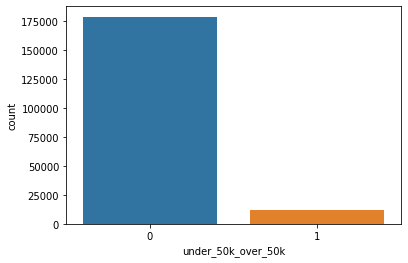

<Figure size 1440x720 with 0 Axes>

In [138]:
sns.countplot(x="under_50k_over_50k", data=data)
plt.figure(figsize=(20,10))

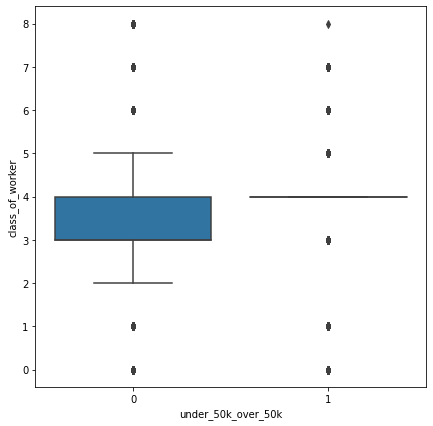

In [139]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="class_of_worker",x='under_50k_over_50k', data=data)

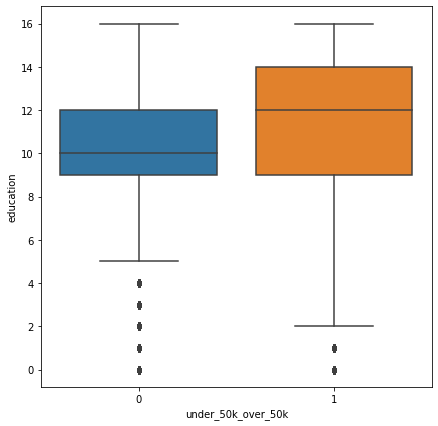

In [140]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="education",x='under_50k_over_50k', data=data)

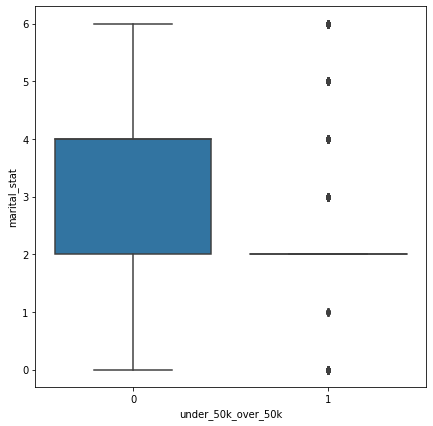

In [141]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="marital_stat",x='under_50k_over_50k', data=data)

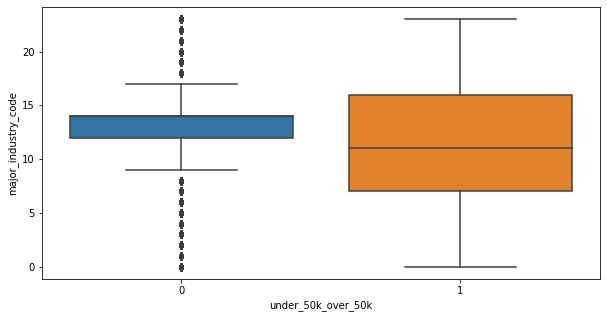

In [142]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="major_industry_code",x='under_50k_over_50k', data=data)

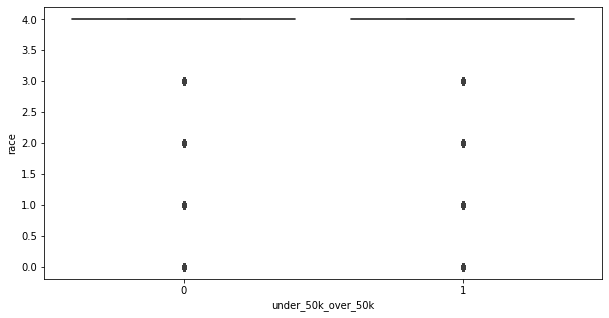

In [143]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='under_50k_over_50k', data=data)

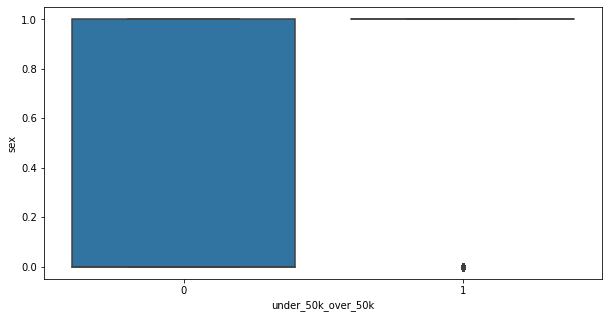

In [144]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='under_50k_over_50k', data=data)

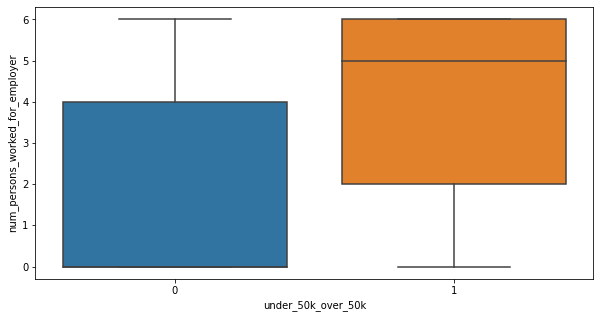

In [145]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="num_persons_worked_for_employer",x='under_50k_over_50k', data=data)

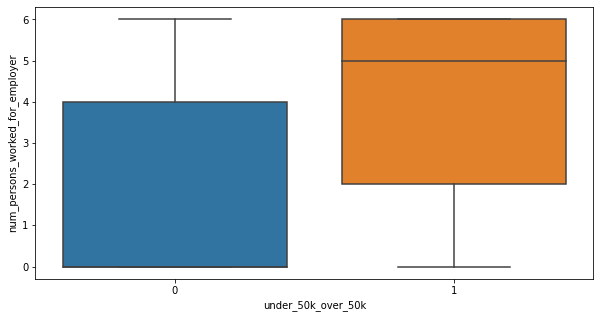

In [146]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="num_persons_worked_for_employer",x='under_50k_over_50k', data=data)

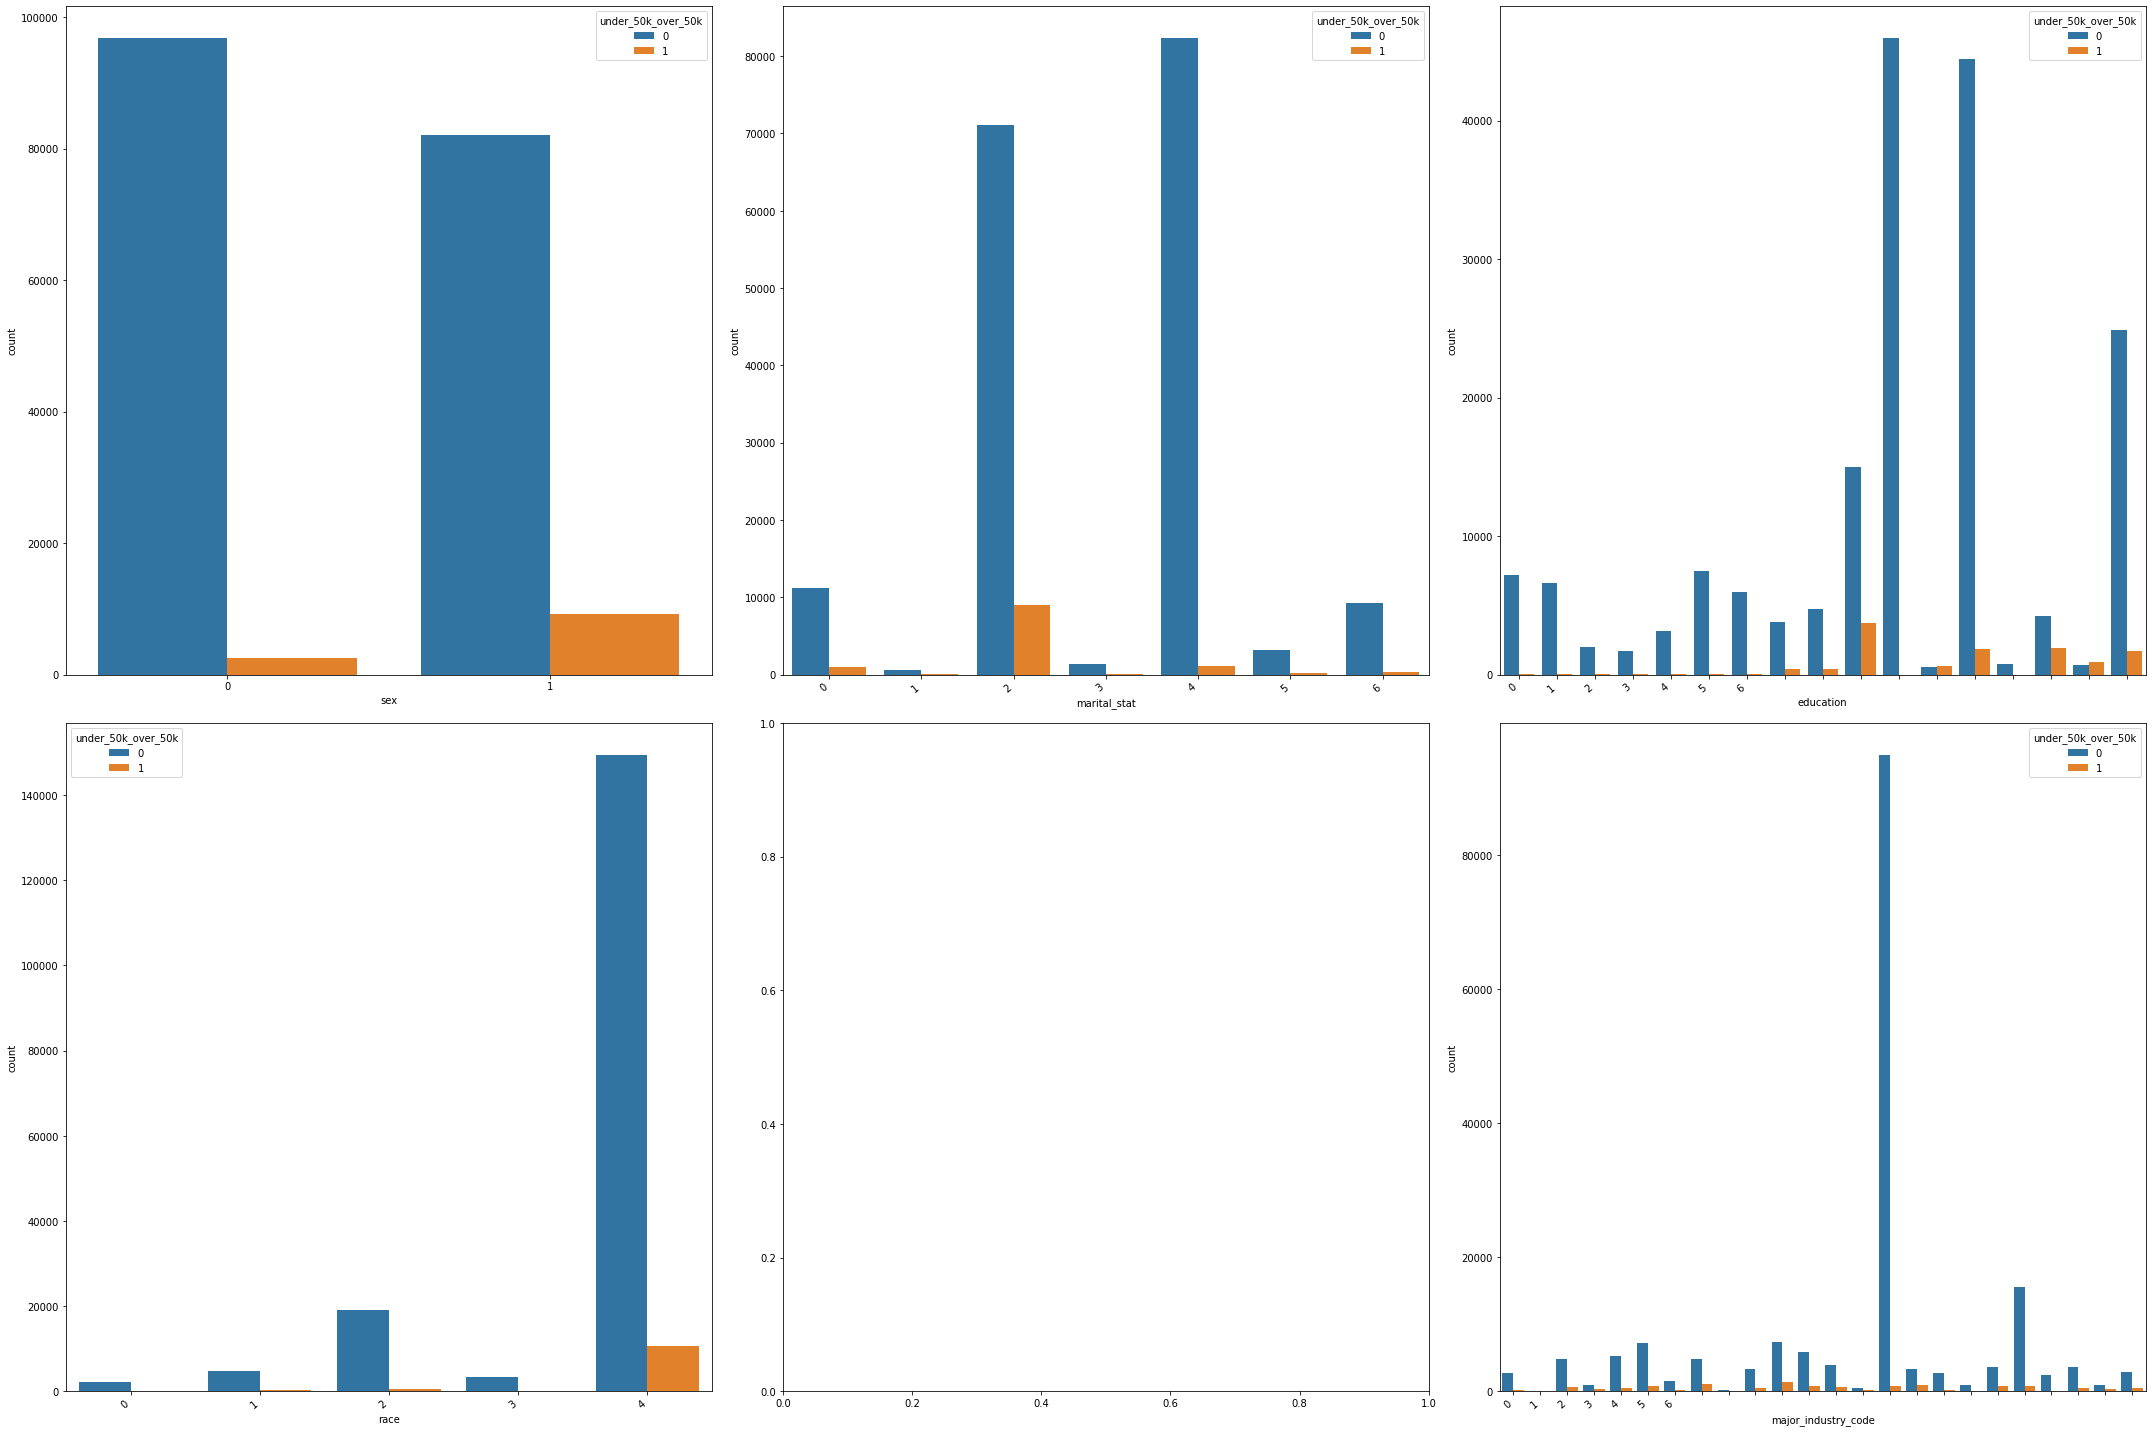

In [147]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=data,hue="under_50k_over_50k",ax = ax[0][0])
cp = sns.countplot(x="marital_stat", data=data,hue="under_50k_over_50k",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=data,hue="under_50k_over_50k",ax = ax[0][2])
cp2.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=data,hue="under_50k_over_50k",ax = ax[1][0])
cp3.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="major_industry_code", data=data,hue="under_50k_over_50k",ax = ax[1][2])
cp4.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


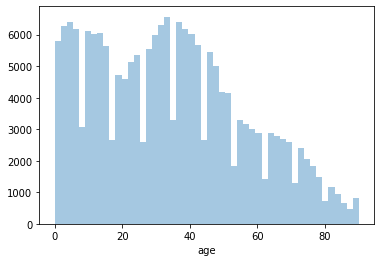

In [148]:
sns.distplot(data['age'],kde = False,bins = 50)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


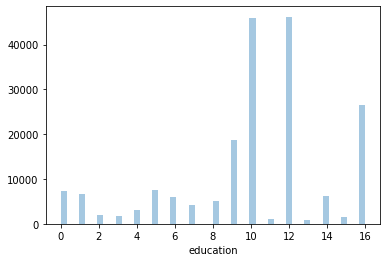

In [149]:
sns.distplot(data['education'],kde = False)

The `size` parameter has been renamed to `height`; please update your code.


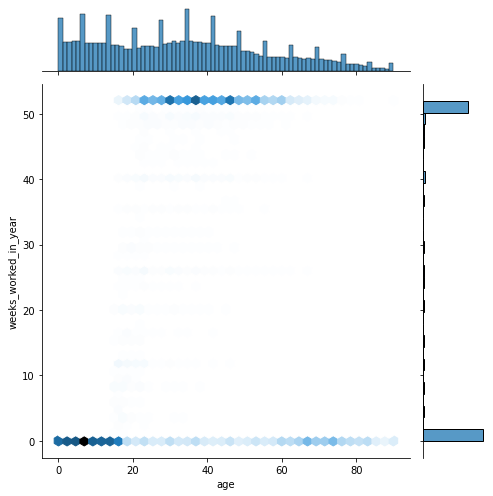

In [150]:
sns.jointplot(x ="age", y="weeks_worked_in_year", data=data,kind="hex",size = 7)

The top 6 features with highest correlation with target variable are 'weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains', 'dividends_from_stocks', ' family_members_under_18' and 'veterans_benefits'.

In [151]:
X = data[['weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains',	'dividends_from_stocks', 'family_members_under_18', 'veterans_benefits']]

Y = data['under_50k_over_50k']

In [152]:
X.head()

,weeks_worked_in_year,num_persons_worked_for_employer,capital_gains,dividends_from_stocks,family_members_under_18,veterans_benefits
0,0,0,0,0,4,2
1,52,1,0,0,4,2
2,0,0,0,0,4,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values, test_size=0.3, random_state=40)

In [154]:
print(X.shape,Y.shape)

(190561, 6) (190561,)


In [155]:
print(X_train.shape,Y_train.shape)

(133392, 6) (133392,)


In [156]:
print(X_test.shape,Y_test.shape)

(57169, 6) (57169,)


In [157]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [158]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))

[[53430   254]
 [ 2732   753]]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


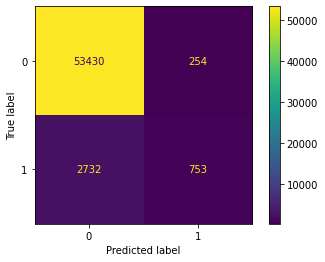

In [159]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model, X_test, Y_test);

In [160]:
accuracy_score(Y_test, y_pred)

0.9477688957302034

In [161]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=[0, 1],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[1],
    predict_fn=xgb_model.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

In [162]:
lime_exp.predict_proba

array([0.98955023, 0.01044975], dtype=float32)

In [164]:
import shap
explainer_shap = shap.KernelExplainer(xgb_model.predict_proba, shap.kmeans(X_test, 100))
shap_values = explainer_shap.shap_values(X_test[:100], nsamples=50)

  0%|          | 0/100 [00:00<?, ?it/s]

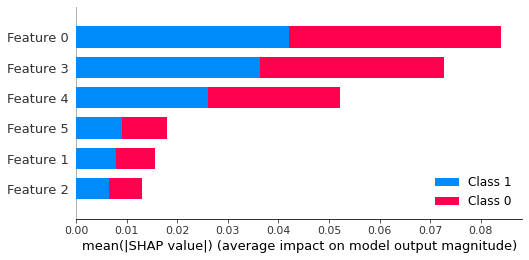

In [166]:
shap.summary_plot(shap_values)

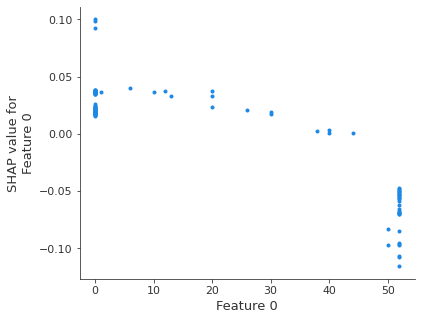

In [167]:
shap.dependence_plot(0, shap_values[0], X_test[:100], interaction_index=None)

In [168]:
shap.initjs()
shap.force_plot(explainer_shap.expected_value[0], shap_values[0], X_test[:100], plot_cmap=["#FF5733","#335BFF"])